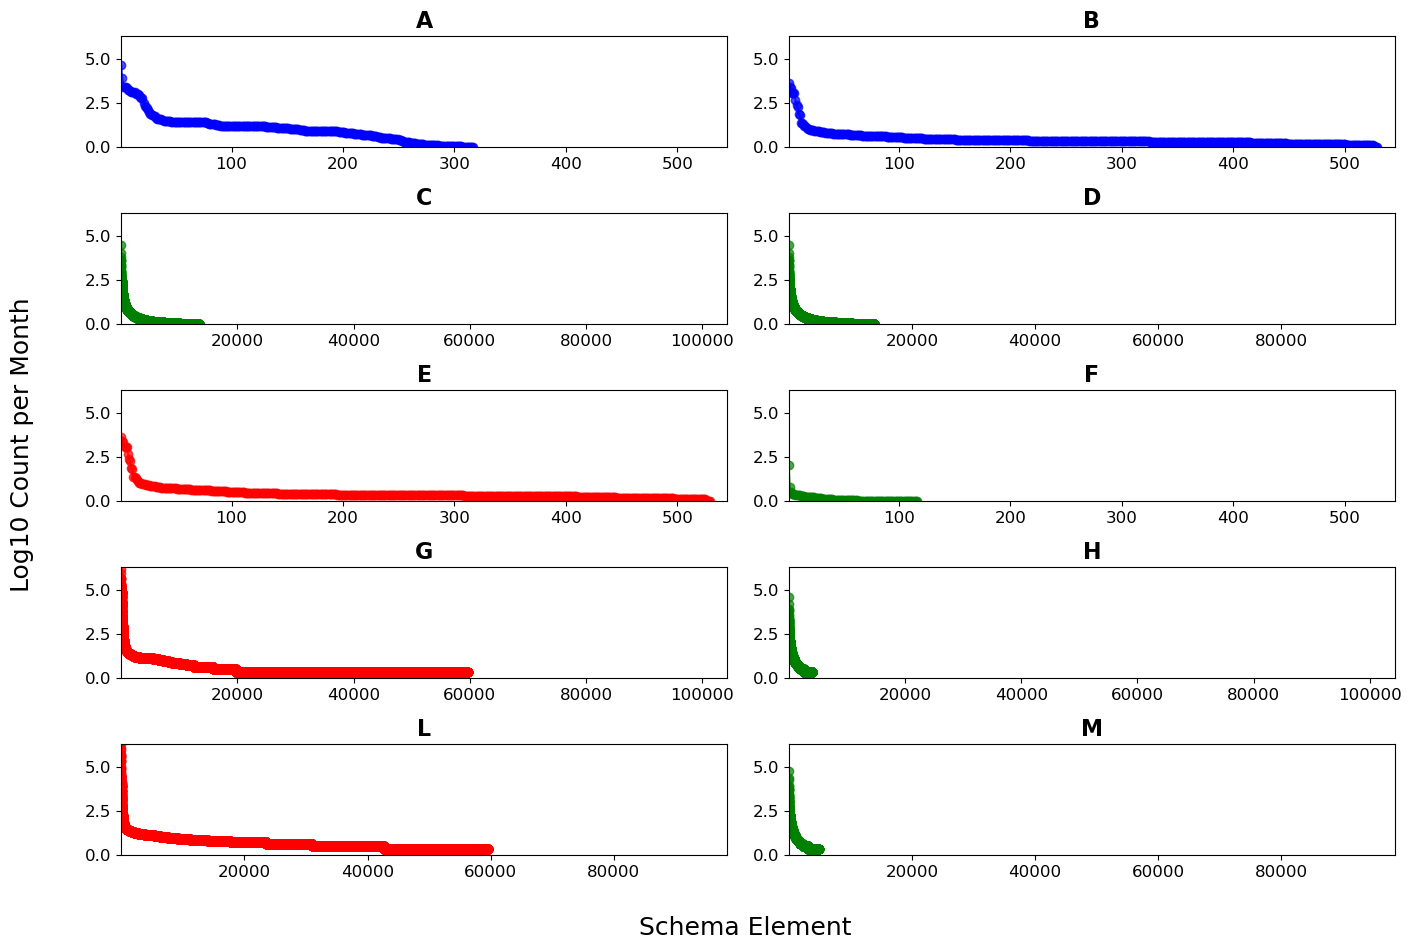

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File paths for all datasets
file_paths = {
    'A': 'Bio2RDF log2013kg2024_combined_schema_elements.csv',
    'B': 'Bio2RDF log2019kg2024_combined_schema_elements.csv',
    'C': 'Wikidata log2017kg2017_combined_schema_elements.csv',
    'D': 'Wikidata log2017kg2018_combined_schema_elements.csv',
    'E': 'Bio2RDF robotic log2019_kg2024_combined_schema_elements.csv',
    'F': 'Bio2RDF organic log2019kg2024_combined_schema_elements.csv',
    'G': 'Wikidata robotic log2017_kg2017_combined_schema_elements.csv',
    'H': 'Wikidata organic-int1 log2018_kg2018_combined_schema_elements.csv',
    'L': 'Wikidata robotic log2018_kg2018_combined_schema_elements.csv',
    'M': 'Wikidata organic-int7 log2018_kg2018_combined_schema_elements.csv'
}

# Durations in months
durations = {
    'A': 16.79,
    'B': 29.93,
    'C': 9.43,
    'D': 9.43,
    'E': 29.93,
    'F': 29.93,
    'G': 0.88,
    'H': 0.88,
    'L': 0.88,
    'M': 0.88,
}

# Maximum number of schema elements
max_elements = {
    'A': 545,
    'B': 545,
    'C': 104314,
    'D': 98462,
    'E': 545,
    'F': 545,
    'G': 104314,
    'H': 104314,
    'L': 98462,
    'M': 98462,
}

# Read the data
data = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Normalize the counts to per month and apply log10 transformation
for name, df in data.items():
    df['NormalizedCount'] = (df['TotalCount'] / durations[name])
    df['LogCount'] = np.log10(df['NormalizedCount'] + 1)

# Define colors for each dataset
color_map = {
    'A': 'blue',
    'B': 'blue',
    'C': 'green',
    'D': 'green',
    'E': 'red',
    'F': 'green',
    'G': 'red',
    'H': 'green',
    'L': 'red',
    'M': 'green'
}

# Calculate the global maximum LogCount across all datasets
global_max_y = max(df['LogCount'].max() for df in data.values())

# Plotting with unified x-axis length
fig, axs = plt.subplots(5, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, df) in enumerate(data.items()):
    # Sort by counts and reset index to create the 1,..,n numbering for x-axis
    sorted_counts = df['LogCount'].sort_values(ascending=False).reset_index(drop=True)
    sorted_counts.index += 1  # Start numbering from 1

    plot_color = color_map[name]
    
    ax = axs[i]
    ax.plot(sorted_counts.index, sorted_counts.values, marker='o', linestyle='-', color=plot_color, alpha=0.7)
    ax.set_title(name, fontsize=16, weight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Set y-axis limit to the global maximum
    ax.set_ylim(0, global_max_y)
    
    # Set x-axis limit to the predefined maximum number of schema elements
    ax.set_xlim(1, max_elements[name])

# Set global labels for x and y axes
fig.text(0.5, 0.01, 'Schema Element', ha='center', fontsize=18)
fig.text(0.01, 0.5, 'Log10 Count per Month', va='center', rotation='vertical', fontsize=18)

# Remove unused subplots if any
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.savefig('comparison_plot_uniform_x_axis.png', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_994221/3047150303.py:61: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Entity'] = df_sorted['Entity'].str.replace('http://bio2rdf.org/', '').str.replace('_vocabulary:', ':')
/tmp/ipykernel_994221/3047150303.py:61: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Entity'] = df_sorted['Entity'].str.replace('http://bio2rdf.org/', '').str.replace('_vocabulary:', ':')
/tmp/ipykernel_994221/3047150303.py:61: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Entity'] = df_sorted['Entity'].str.replace('http://bio2rdf.org/', '').str.replace('_vocabulary:', ':')
/tmp/ipykernel_994221/3047150303.py:61: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Entity'] = df_sorted['Entity'].str.replace('http://bio2rdf.org/', '').str.replace('_vocabulary:', ':')


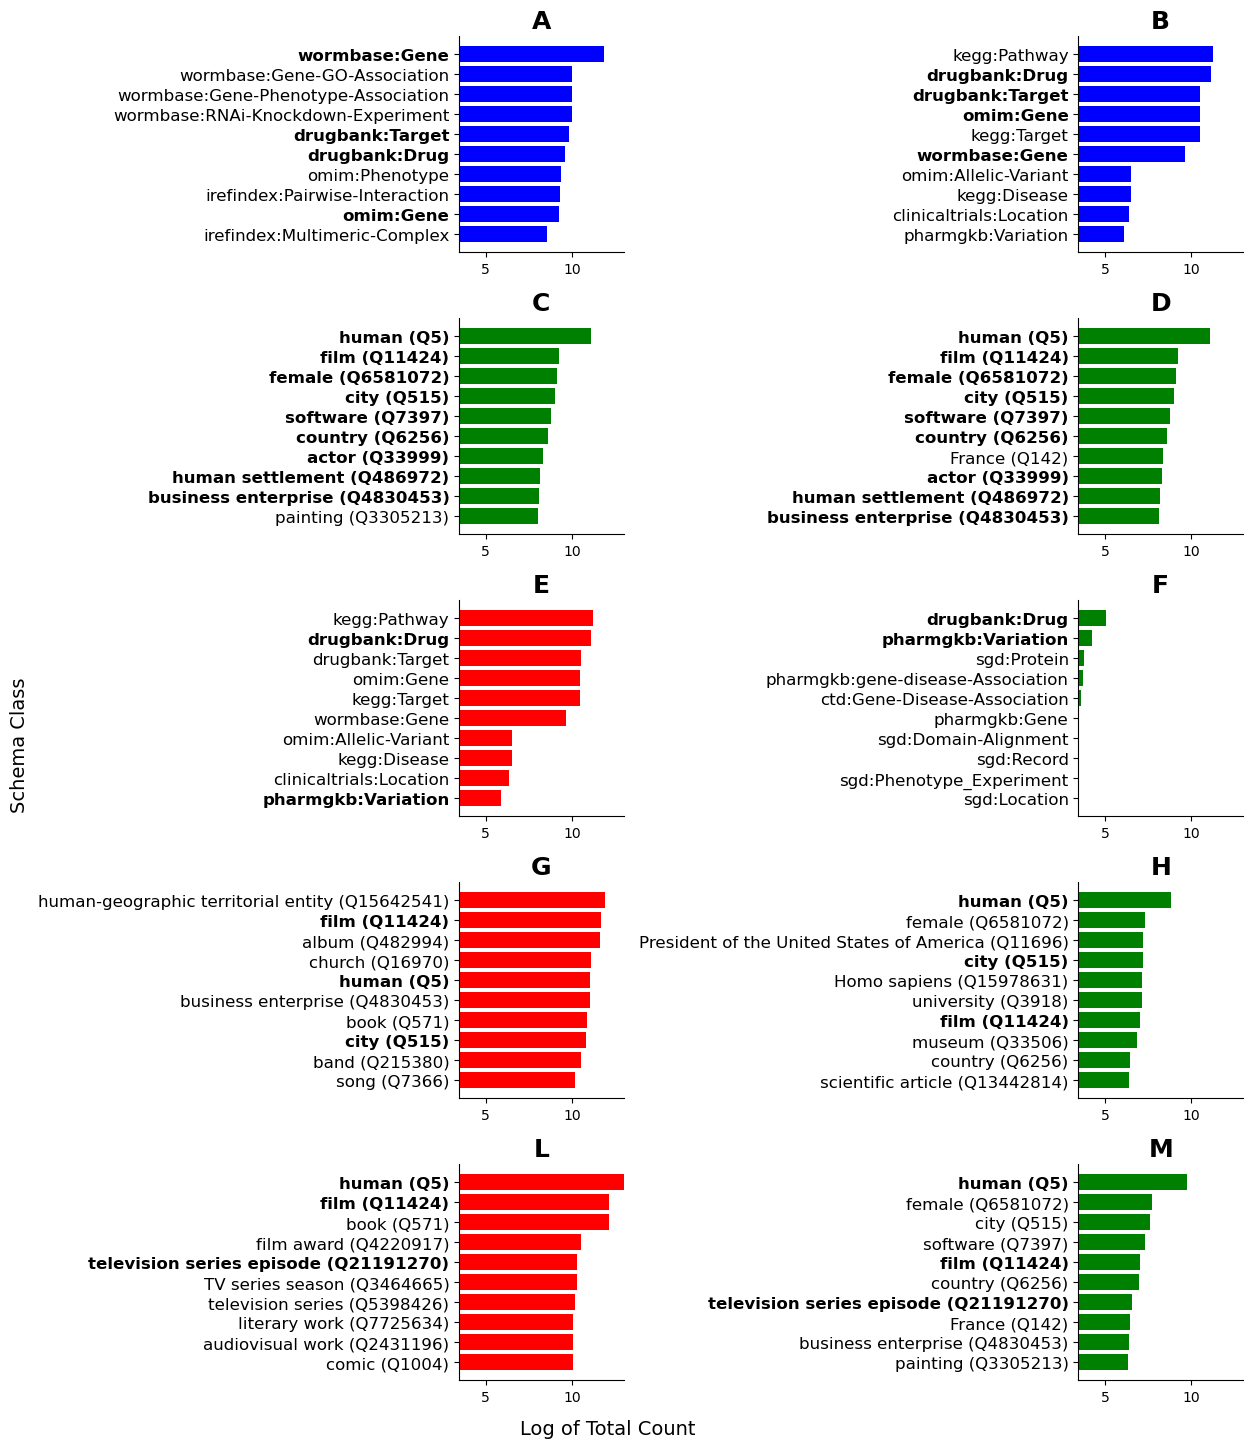

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from matplotlib.font_manager import FontProperties

# Function to fetch labels for Wikidata entities
def query_wikidata_label(property_id, endpoint_url):
    sparql_query = f'''
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

    SELECT ?label WHERE {{
        wd:{property_id} rdfs:label ?label .
        FILTER(LANG(?label) = "en")
    }}
    '''
    params = {
        'query': sparql_query,
        'format': 'json'
    }
    response = requests.get(endpoint_url, params=params)
    data = response.json()
    try:
        label = data['results']['bindings'][0]['label']['value']
        return f"{label} ({property_id})"
    except IndexError:
        return property_id  # Return ID if no label is found

# File paths
file_paths = {
    'a': 'bio2rdf2013_no-resource_heatmap_unique_types_no_repeat.csv',
    'b': 'bio2rdf2019_heatmap_unique_types_no_repeat.csv',
    'c': 'wiki2017_heatmap_unique_types_no_repeat.csv',
    'd': 'wiki2018_heatmap_unique_types2018_no_repeat.csv',
    'e': 'robotic-bio2019-schema-classes.csv',
    'f': 'organic-bio2rdf2019-schema-classes.csv',
    'g': 'robotic_schema-classes-2017-wiki.csv',
    'h': 'organic-int1_heatmap_unique_types2018_no_repeat.csv',
    'L': 'robotic_schema-classes2018wiki.csv',
    'M': 'organic-int7_heatmap_unique_types2018_no_repeat.csv'
}

# Endpoints for Wikidata 2017 and 2018
endpoint_url_2017 = "https://maryam.wikidata2016.137.120.31.148.nip.io/bigdata/namespace/kb/sparql"
endpoint_url_2018 = "https://maryam.blazegraph.137.120.31.148.nip.io/bigdata/namespace/kb/sparql"

# Read and process data
data = {}
max_log_count = -np.inf
min_log_count = np.inf

for label, path in file_paths.items():
    df = pd.read_csv(path)
    df['LogTotalCount'] = np.log(df['TotalCount'])
    df_sorted = df.sort_values(by='LogTotalCount', ascending=False).head(10)
    
    # Process entity labels for Bio2RDF data
    if label in ['e', 'f', 'a', 'b']:
        df_sorted['Entity'] = df_sorted['Entity'].str.replace('http://bio2rdf.org/', '').str.replace('_vocabulary:', ':')
    data[label] = df_sorted
    max_log_count = max(max_log_count, df_sorted['LogTotalCount'].max())
    min_log_count = min(min_log_count, df_sorted['LogTotalCount'].min())

# Fetching labels for Wikidata entities from respective endpoints
def fetch_labels_for_entities(entities, endpoint_url):
    return {entity: query_wikidata_label(entity.split('/')[-1], endpoint_url) for entity in entities}

# Process Wikidata entities for A, B, E, F
wikidata_entities_2017 = data['c']['Entity'].apply(lambda x: x.split('/')[-1]).tolist()
wikidata_entities_2018 = data['d']['Entity'].apply(lambda x: x.split('/')[-1]).tolist()
wikidata_entities_2017_g = data['g']['Entity'].apply(lambda x: x.split('/')[-1]).tolist()
wikidata_entities_2017_h = data['h']['Entity'].apply(lambda x: x.split('/')[-1]).tolist()
wikidata_entities_2018_l = data['L']['Entity'].apply(lambda x: x.split('/')[-1]).tolist()
wikidata_entities_2018_m = data['M']['Entity'].apply(lambda x: x.split('/')[-1]).tolist()


wikidata_labels_2017 = fetch_labels_for_entities(wikidata_entities_2017, endpoint_url_2017)
wikidata_labels_2018 = fetch_labels_for_entities(wikidata_entities_2018, endpoint_url_2018)
wikidata_labels_2017_g = fetch_labels_for_entities(wikidata_entities_2017_g, endpoint_url_2017)
wikidata_labels_2017_h = fetch_labels_for_entities(wikidata_entities_2017_h, endpoint_url_2017)
wikidata_labels_2018_l = fetch_labels_for_entities(wikidata_entities_2018_l, endpoint_url_2018)
wikidata_labels_2018_m = fetch_labels_for_entities(wikidata_entities_2018_m, endpoint_url_2018)


# Update Wikidata entity labels
data['c']['Entity'] = data['c']['Entity'].apply(lambda x: wikidata_labels_2017.get(x.split('/')[-1], x))
data['d']['Entity'] = data['d']['Entity'].apply(lambda x: wikidata_labels_2018.get(x.split('/')[-1], x))
data['g']['Entity'] = data['g']['Entity'].apply(lambda x: wikidata_labels_2017_g.get(x.split('/')[-1], x))
data['h']['Entity'] = data['h']['Entity'].apply(lambda x: wikidata_labels_2017_h.get(x.split('/')[-1], x))
data['L']['Entity'] = data['L']['Entity'].apply(lambda x: wikidata_labels_2018_l.get(x.split('/')[-1], x))
data['M']['Entity'] = data['M']['Entity'].apply(lambda x: wikidata_labels_2018_m.get(x.split('/')[-1], x))

# Identify common entities between pairs
pair_common_entities = {
    ('a', 'b'): set(data['a']['Entity']).intersection(set(data['b']['Entity'])),
    ('c', 'd'): set(data['c']['Entity']).intersection(set(data['d']['Entity'])),
    ('e', 'f'): set(data['e']['Entity']).intersection(set(data['f']['Entity'])),
    ('g', 'h'): set(data['g']['Entity']).intersection(set(data['h']['Entity'])),
    ('L', 'M'): set(data['L']['Entity']).intersection(set(data['M']['Entity']))
}

# Plotting
fig, axes = plt.subplots(5, 2, figsize=(13, 15))
axes = axes.flatten()

# Updated colors for the plots
colors = {
    'a': 'blue',
    'b': 'blue',
    'c': 'green',
    'd': 'green',
    'e': 'red',
    'f': 'green',
    'g': 'red',
    'h': 'green',
    'L': 'red',
    'M': 'green'
}


for ax, (label, df) in zip(axes, data.items()):
    # Assign color based on the dataset
    bar_color = colors[label]
    
    # Identify common entities within pairs
    if label in ['a', 'b']:
        common_entities = pair_common_entities[('a', 'b')]
    elif label in ['c', 'd']:
        common_entities = pair_common_entities[('c', 'd')]
    elif label in ['e', 'f']:
        common_entities = pair_common_entities[('e', 'f')]
    elif label in ['g', 'h']:
        common_entities = pair_common_entities[('g', 'h')]
    else:
        common_entities = pair_common_entities[('L', 'M')]
    
    # Plot bar chart
    bars = ax.barh(df['Entity'], df['LogTotalCount'], color=bar_color)
    ax.set_title(f"{label.upper()}", fontsize=18, fontweight='bold')
    ax.invert_yaxis()
    ax.set_xlim(min_log_count, max_log_count)
    
    # Highlight common entities
    for y_label in ax.get_yticklabels():
        if y_label.get_text() in common_entities:
            y_label.set_fontproperties(FontProperties(weight='bold'))
        y_label.set_fontsize(12)
    
    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Set common labels for x and y axis
fig.text(0.5, 0.04, 'Log of Total Count', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Schema Class', va='center', rotation='vertical', fontsize=14)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig('popular_classes_updated_colors_with_required_coloring.png', dpi=300, bbox_inches='tight')
plt.show()


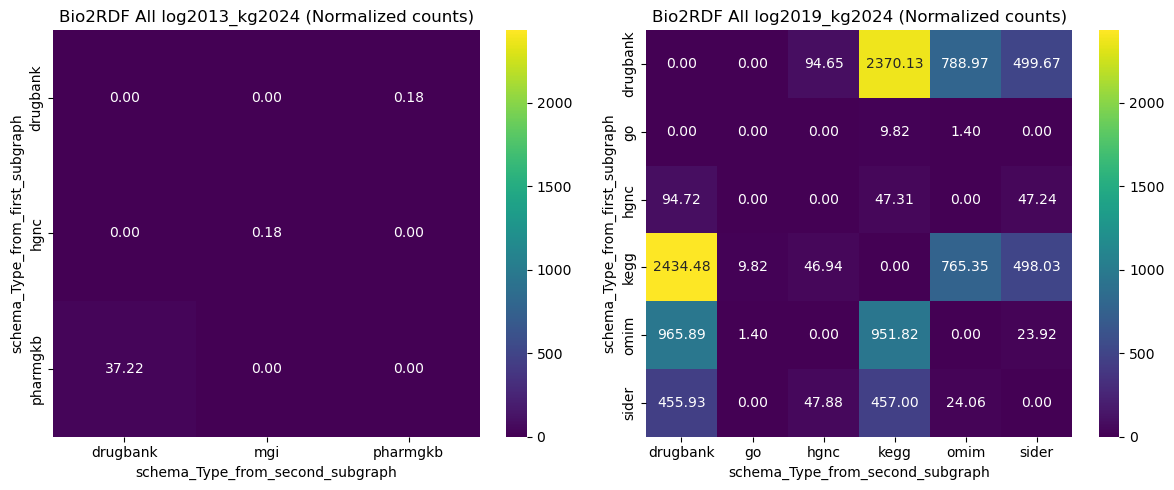

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV files
file_2013_query = pd.read_csv('2013_query_DS_rel_patterns.csv')
file_2019_query = pd.read_csv('2019_query_DS_rel_patterns26.csv')

# Normalize the count column for 2013 and 2019 datasets
months_2013 = 16.79
months_2019 = 29.93

# Normalize 'count' for 2013 data
file_2013_query['count'] = file_2013_query['count'] / months_2013

# Normalize 'count' for 2019 data
file_2019_query['count'] = file_2019_query['count'] / months_2019

# Create pivot tables for each dataset
pivot_2013 = file_2013_query.pivot_table(index='subject', columns='object', values='count', fill_value=0)
pivot_2019 = file_2019_query.pivot_table(index='subject', columns='object', values='count', fill_value=0)

# Renaming the index and columns for presentation in the heatmap
pivot_2013.index.rename('schema_Type_from_first_subgraph', inplace=True)
pivot_2013.columns.rename('schema_Type_from_second_subgraph', inplace=True)
pivot_2019.index.rename('schema_Type_from_first_subgraph', inplace=True)
pivot_2019.columns.rename('schema_Type_from_second_subgraph', inplace=True)

# Set the same color legend (color range) for both heatmaps
vmin = min(pivot_2013.min().min(), pivot_2019.min().min())
vmax = max(pivot_2013.max().max(), pivot_2019.max().max())

# Plotting the heatmaps
plt.figure(figsize=(12, 5))

# Heatmap for normalized 2013 data with the same color scale
plt.subplot(1, 2, 1)
sns.heatmap(pivot_2013, annot=True, fmt=".2f", cmap='viridis', vmin=vmin, vmax=vmax)
plt.title('Bio2RDF All log2013_kg2024 (Normalized counts)')

# Heatmap for normalized 2019 data with the same color scale
plt.subplot(1, 2, 2)
sns.heatmap(pivot_2019, annot=True, fmt=".2f", cmap='viridis', vmin=vmin, vmax=vmax)
plt.title('Bio2RDF All log2019_kg2024 (Normalized counts)')

plt.tight_layout()
plt.savefig('d1-d2.png', dpi=300, bbox_inches='tight')  # Save the figure

plt.show()


In [2]:
import pandas as pd
from scipy.stats import ttest_rel, spearmanr, kendalltau, shapiro, wilcoxon
import matplotlib.pyplot as plt

# Define the number of months for normalization
months_2013 = 16.79
months_2019 = 29.93

# Load the CSV files
data_2019 = pd.read_csv('Bio2RDF log2019kg2024_combined_schema_elements.csv')
data_2013 = pd.read_csv('Bio2RDF log2013kg2024_combined_schema_elements.csv')

# Rename 'TotalCount' in each dataset to differentiate by year
data_2019.rename(columns={'TotalCount': 'TotalCount_2019'}, inplace=True)
data_2013.rename(columns={'TotalCount': 'TotalCount_2013'}, inplace=True)

# Merge the datasets on the common "Schema Element"
merged_data = pd.merge(data_2019[['Schema Element', 'TotalCount_2019']], 
                       data_2013[['Schema Element', 'TotalCount_2013']], 
                       on='Schema Element', how='inner')

# Drop rows with zero counts in either year before normalization
merged_data = merged_data[(merged_data['TotalCount_2019'] > 0) & (merged_data['TotalCount_2013'] > 0)]

# Normalize the counts by dividing by the number of months
merged_data['Normalized_2019'] = merged_data['TotalCount_2019'] / months_2019
merged_data['Normalized_2013'] = merged_data['TotalCount_2013'] / months_2013

# Handle any potential NaNs or infinity values
merged_data.replace([float('inf'), -float('inf'), float('nan')], 0, inplace=True)

# Drop rows with any remaining missing values (if any)
merged_data.dropna(inplace=True)

# Save the updated data to a new CSV file
merged_data.to_csv('merged_data_normalized.csv', index=False)

# Calculate the change in counts using the normalized data
merged_data['Change'] = merged_data['Normalized_2019'] - merged_data['Normalized_2013']

# Sort and display the top changes in counts
top_changes = merged_data.sort_values(by='Change', key=lambda x: abs(x), ascending=False).head(10)
print(top_changes[['Schema Element', 'Normalized_2013', 'Normalized_2019', 'Change']])

# Rank the elements based on counts for each year
merged_data['Rank_2019'] = merged_data['Normalized_2019'].rank(method='dense', ascending=False)
merged_data['Rank_2013'] = merged_data['Normalized_2013'].rank(method='dense', ascending=False)
merged_data['Rank Change'] = merged_data['Rank_2019'] - merged_data['Rank_2013']

# Perform the paired t-test on normalized data
t_stat, p_value = ttest_rel(merged_data['Normalized_2019'], merged_data['Normalized_2013'])
print(f"Paired t-test [normalized]: t={t_stat:.3f}, p={p_value:.3f}")

# Check for normality of the difference in frequencies
# Perform Shapiro-Wilk test on the difference
diff = merged_data['Normalized_2019'] - merged_data['Normalized_2013']
stat, p_value = shapiro(diff)
print(f"Shapiro-Wilk test for normality of the difference: stat={stat:.3f}, p={p_value:.3f}")

# If p-value is less than 0.05, the data is not normally distributed, and a different test (e.g., Wilcoxon) may be more appropriate

# Calculate Spearman's and Kendall's rank correlation coefficients on normalized data
spearman_corr, spearman_p = spearmanr(merged_data['Rank_2019'], merged_data['Rank_2013'])
kendall_tau, kendall_p = kendalltau(merged_data['Rank_2019'], merged_data['Rank_2013'])

# Output results
print(f"Spearman's correlation: ρ={spearman_corr:.3f}, p={spearman_p:.3g}")
print(f"Kendall's tau: τ={kendall_tau:.3f}, p={kendall_p:.3g}")

# Display the schema elements with the most significant changes in ranking
top_rank_changes = merged_data.sort_values(by='Rank Change', key=lambda x: abs(x), ascending=False).head(10)
print(top_rank_changes[['Schema Element', 'Rank_2019', 'Rank_2013', 'Rank Change']])

# Wilcoxon test if normality assumption is not met
if p_value < 0.05:
    stat, p_value = wilcoxon(merged_data['Normalized_2019'], merged_data['Normalized_2013'])
    print(f"Wilcoxon test: statistic={stat:.3f}, p={p_value:.3f}")

# C-index calculation
def concordance_index(ranking_2013, ranking_2019):
    """
    Calculate the Concordance Index (C-index) between two sets of rankings.
    ranking_2013: rankings from 2013
    ranking_2019: rankings from 2019
    """
    concordant_pairs = 0
    total_pairs = 0
    
    n = len(ranking_2013)
    
    for i in range(n):
        for j in range(i + 1, n):
            # Compare the pair (i, j)
            if (ranking_2013[i] < ranking_2013[j] and ranking_2019[i] < ranking_2019[j]) or (ranking_2013[i] > ranking_2013[j] and ranking_2019[i] > ranking_2019[j]):
                concordant_pairs += 1
            total_pairs += 1
    
    return concordant_pairs / total_pairs if total_pairs > 0 else 0

# Calculate the C-index for the rankings of 2013 and 2019
c_index = concordance_index(merged_data['Rank_2013'], merged_data['Rank_2019'])
print(f"Concordance Index (C-index): {c_index:.3f}")


                                        Schema Element  Normalized_2013  \
309    http://www.w3.org/1999/02/22-rdf-syntax-ns#type     46693.984515   
273        http://bio2rdf.org/wormbase_vocabulary:Gene      8627.575938   
301        http://bio2rdf.org/wormbase_vocabulary:gene      2662.596784   
111      http://bio2rdf.org/drugbank_vocabulary:target      2824.002382   
132  http://bio2rdf.org/irefindex_vocabulary:intera...      2554.377606   
143         http://bio2rdf.org/kegg_vocabulary:Pathway        24.061942   
310    http://www.w3.org/2000/01/rdf-schema#subClassOf      2266.944610   
98   http://bio2rdf.org/drugbank_vocabulary:indication      1809.469923   
110     http://bio2rdf.org/drugbank_vocabulary:synonym      1766.646814   
133  http://bio2rdf.org/irefindex_vocabulary:intera...      1507.504467   

     Normalized_2019        Change  
309      4453.491480 -42240.493034  
273       515.736719  -8111.839219  
301         0.935516  -2661.661268  
111       243.768794  -258

In [2]:
import pandas as pd
from scipy.stats import ttest_rel, spearmanr, kendalltau, shapiro, wilcoxon
import matplotlib.pyplot as plt

# Define the number of months for normalization
months_2013 = 0.88
months_2019 = 0.88

# Load the CSV files
data_2019 = pd.read_csv('Wikidata robotic log2018_kg2018_combined_schema_elements.csv')
data_2013 = pd.read_csv('Wikidata robotic log2017_kg2017_combined_schema_elements.csv')

# Rename 'TotalCount' in each dataset to differentiate by year
data_2019.rename(columns={'TotalCount': 'TotalCount_2019'}, inplace=True)
data_2013.rename(columns={'TotalCount': 'TotalCount_2013'}, inplace=True)

# Merge the datasets on the common "Schema Element"
merged_data = pd.merge(data_2019[['Schema Element', 'TotalCount_2019']], 
                       data_2013[['Schema Element', 'TotalCount_2013']], 
                       on='Schema Element', how='inner')

# Drop rows with zero counts in either year before normalization
merged_data = merged_data[(merged_data['TotalCount_2019'] > 0) & (merged_data['TotalCount_2013'] > 0)]

# Normalize the counts by dividing by the number of months
merged_data['Normalized_2019'] = merged_data['TotalCount_2019'] / months_2019
merged_data['Normalized_2013'] = merged_data['TotalCount_2013'] / months_2013

# Handle any potential NaNs or infinity values
merged_data.replace([float('inf'), -float('inf'), float('nan')], 0, inplace=True)

# Drop rows with any remaining missing values (if any)
merged_data.dropna(inplace=True)

# Save the updated data to a new CSV file
merged_data.to_csv('merged_data_normalized.csv', index=False)

# Calculate the change in counts using the normalized data
merged_data['Change'] = merged_data['Normalized_2019'] - merged_data['Normalized_2013']

# Sort and display the top changes in counts
top_changes = merged_data.sort_values(by='Change', key=lambda x: abs(x), ascending=False).head(10)
print(top_changes[['Schema Element', 'Normalized_2013', 'Normalized_2019', 'Change']])

# Rank the elements based on counts for each year
merged_data['Rank_2019'] = merged_data['Normalized_2019'].rank(method='dense', ascending=False)
merged_data['Rank_2013'] = merged_data['Normalized_2013'].rank(method='dense', ascending=False)
merged_data['Rank Change'] = merged_data['Rank_2019'] - merged_data['Rank_2013']

# Perform the paired t-test on normalized data
t_stat, p_value = ttest_rel(merged_data['Normalized_2019'], merged_data['Normalized_2013'])
print(f"Paired t-test [normalized]: t={t_stat:.3f}, p={p_value:.3f}")

# Check for normality of the difference in frequencies
# Perform Shapiro-Wilk test on the difference
diff = merged_data['Normalized_2019'] - merged_data['Normalized_2013']
stat, p_value = shapiro(diff)
print(f"Shapiro-Wilk test for normality of the difference: stat={stat:.3f}, p={p_value:.3f}")

# If p-value is less than 0.05, the data is not normally distributed, and a different test (e.g., Wilcoxon) may be more appropriate

# Calculate Spearman's and Kendall's rank correlation coefficients on normalized data
spearman_corr, spearman_p = spearmanr(merged_data['Rank_2019'], merged_data['Rank_2013'])
kendall_tau, kendall_p = kendalltau(merged_data['Rank_2019'], merged_data['Rank_2013'])

# Output results
print(f"Spearman's correlation: ρ={spearman_corr:.3f}, p={spearman_p:.3g}")
print(f"Kendall's tau: τ={kendall_tau:.3f}, p={kendall_p:.3g}")

# Display the schema elements with the most significant changes in ranking
top_rank_changes = merged_data.sort_values(by='Rank Change', key=lambda x: abs(x), ascending=False).head(10)
print(top_rank_changes[['Schema Element', 'Rank_2019', 'Rank_2013', 'Rank Change']])

# Wilcoxon test if normality assumption is not met
if p_value < 0.05:
    stat, p_value = wilcoxon(merged_data['Normalized_2019'], merged_data['Normalized_2013'])
    print(f"Wilcoxon test: statistic={stat:.3f}, p={p_value:.3f}")

import numpy as np

def concordance_index(ranking_2013, ranking_2019):
    """
    Calculate the Concordance Index (C-index) between two sets of rankings.
    ranking_2013: rankings from 2013
    ranking_2019: rankings from 2019
    """
    # Convert rankings to numpy arrays for efficient computation
    ranking_2013 = np.array(ranking_2013)
    ranking_2019 = np.array(ranking_2019)
    
    concordant_pairs = 0
    total_pairs = 0
    
    n = len(ranking_2013)
    
    for i in range(n):
        for j in range(i + 1, n):
            # Compare the pair (i, j) and check for concordance
            if (ranking_2013[i] < ranking_2013[j] and ranking_2019[i] < ranking_2019[j]) or \
               (ranking_2013[i] > ranking_2013[j] and ranking_2019[i] > ranking_2019[j]):
                concordant_pairs += 1
            total_pairs += 1
    
    # Return C-index
    return concordant_pairs / total_pairs if total_pairs > 0 else 0


# Calculate the C-index for the rankings of 2013 and 2019
c_index = concordance_index(merged_data['Rank_2013'], merged_data['Rank_2019'])
print(f"Concordance Index (C-index): {c_index:.3f}")


                                 Schema Element  Normalized_2013  \
34520  http://www.wikidata.org/prop/direct/P166     4.998909e+05   
34341  http://www.wikidata.org/prop/direct/P106     4.631205e+05   
26987         http://www.wikidata.org/entity/Q5     7.240227e+04   
34418  http://www.wikidata.org/prop/direct/P136     4.340193e+05   
34966  http://www.wikidata.org/prop/direct/P425     1.544636e+05   
34897  http://www.wikidata.org/prop/direct/P361     8.773182e+04   
34842   http://www.wikidata.org/prop/direct/P31     1.752300e+06   
34993   http://www.wikidata.org/prop/direct/P50     1.277239e+05   
34551  http://www.wikidata.org/prop/direct/P179     9.811136e+04   
34505  http://www.wikidata.org/prop/direct/P162     2.541750e+05   

       Normalized_2019         Change  
34520     4.464773e+03 -495426.136364  
34341     9.400295e+05  476909.090909  
26987     5.016068e+05  429204.545455  
34418     1.227614e+04 -421743.181818  
34966     5.501557e+05  395692.045455  
34897     4

/opt/conda/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Concordance Index (C-index): 0.473


In [1]:
import pandas as pd
from scipy.stats import ttest_rel, spearmanr, kendalltau, shapiro, wilcoxon
import matplotlib.pyplot as plt

# Define the number of months for normalization
months_2013 = 0.88
months_2019 = 0.88

# Load the CSV files
data_2019 = pd.read_csv('Wikidata organic-int7 log2018_kg2018_combined_schema_elements.csv')
data_2013 = pd.read_csv('Wikidata organic-int1 log2018_kg2018_combined_schema_elements.csv')

# Rename 'TotalCount' in each dataset to differentiate by year
data_2019.rename(columns={'TotalCount': 'TotalCount_2019'}, inplace=True)
data_2013.rename(columns={'TotalCount': 'TotalCount_2013'}, inplace=True)

# Merge the datasets on the common "Schema Element"
merged_data = pd.merge(data_2019[['Schema Element', 'TotalCount_2019']], 
                       data_2013[['Schema Element', 'TotalCount_2013']], 
                       on='Schema Element', how='inner')

# Drop rows with zero counts in either year before normalization
merged_data = merged_data[(merged_data['TotalCount_2019'] > 0) & (merged_data['TotalCount_2013'] > 0)]

# Normalize the counts by dividing by the number of months
merged_data['Normalized_2019'] = merged_data['TotalCount_2019'] / months_2019
merged_data['Normalized_2013'] = merged_data['TotalCount_2013'] / months_2013

# Handle any potential NaNs or infinity values
merged_data.replace([float('inf'), -float('inf'), float('nan')], 0, inplace=True)

# Drop rows with any remaining missing values (if any)
merged_data.dropna(inplace=True)

# Save the updated data to a new CSV file
merged_data.to_csv('merged_data_normalized.csv', index=False)

# Calculate the change in counts using the normalized data
merged_data['Change'] = merged_data['Normalized_2019'] - merged_data['Normalized_2013']

# Sort and display the top changes in counts
top_changes = merged_data.sort_values(by='Change', key=lambda x: abs(x), ascending=False).head(10)
print(top_changes[['Schema Element', 'Normalized_2013', 'Normalized_2019', 'Change']])

# Rank the elements based on counts for each year
merged_data['Rank_2019'] = merged_data['Normalized_2019'].rank(method='dense', ascending=False)
merged_data['Rank_2013'] = merged_data['Normalized_2013'].rank(method='dense', ascending=False)
merged_data['Rank Change'] = merged_data['Rank_2019'] - merged_data['Rank_2013']

# Perform the paired t-test on normalized data
t_stat, p_value = ttest_rel(merged_data['Normalized_2019'], merged_data['Normalized_2013'])
print(f"Paired t-test [normalized]: t={t_stat:.3f}, p={p_value:.3f}")

# Check for normality of the difference in frequencies
# Perform Shapiro-Wilk test on the difference
diff = merged_data['Normalized_2019'] - merged_data['Normalized_2013']
stat, p_value = shapiro(diff)
print(f"Shapiro-Wilk test for normality of the difference: stat={stat:.3f}, p={p_value:.3f}")

# If p-value is less than 0.05, the data is not normally distributed, and a different test (e.g., Wilcoxon) may be more appropriate

# Calculate Spearman's and Kendall's rank correlation coefficients on normalized data
spearman_corr, spearman_p = spearmanr(merged_data['Rank_2019'], merged_data['Rank_2013'])
kendall_tau, kendall_p = kendalltau(merged_data['Rank_2019'], merged_data['Rank_2013'])

# Output results
print(f"Spearman's correlation: ρ={spearman_corr:.3f}, p={spearman_p:.3g}")
print(f"Kendall's tau: τ={kendall_tau:.3f}, p={kendall_p:.3g}")

# Display the schema elements with the most significant changes in ranking
top_rank_changes = merged_data.sort_values(by='Rank Change', key=lambda x: abs(x), ascending=False).head(10)
print(top_rank_changes[['Schema Element', 'Rank_2019', 'Rank_2013', 'Rank Change']])

# Wilcoxon test if normality assumption is not met
if p_value < 0.05:
    stat, p_value = wilcoxon(merged_data['Normalized_2019'], merged_data['Normalized_2013'])
    print(f"Wilcoxon test: statistic={stat:.3f}, p={p_value:.3f}")

# C-index calculation
def concordance_index(ranking_2013, ranking_2019):
    """
    Calculate the Concordance Index (C-index) between two sets of rankings.
    ranking_2013: rankings from 2013
    ranking_2019: rankings from 2019
    """
    concordant_pairs = 0
    total_pairs = 0
    
    n = len(ranking_2013)
    
    for i in range(n):
        for j in range(i + 1, n):
            # Compare the pair (i, j)
            if (ranking_2013[i] < ranking_2013[j] and ranking_2019[i] < ranking_2019[j]) or (ranking_2013[i] > ranking_2013[j] and ranking_2019[i] > ranking_2019[j]):
                concordant_pairs += 1
            total_pairs += 1
    
    return concordant_pairs / total_pairs if total_pairs > 0 else 0

# Calculate the C-index for the rankings of 2013 and 2019
c_index = concordance_index(merged_data['Rank_2013'], merged_data['Rank_2019'])
print(f"Concordance Index (C-index): {c_index:.3f}")


                                 Schema Element  Normalized_2013  \
1764    http://www.wikidata.org/prop/direct/P31     43594.318182   
1164          http://www.wikidata.org/entity/Q5      7911.363636   
1738   http://www.wikidata.org/prop/direct/P279     16230.681818   
1551   http://www.wikidata.org/prop/direct/P106      4287.500000   
1729    http://www.wikidata.org/prop/direct/P27      2159.090909   
1696    http://www.wikidata.org/prop/direct/P21      3230.681818   
1666  http://www.wikidata.org/prop/direct/P1811         2.272727   
1678    http://www.wikidata.org/prop/direct/P19      2161.363636   
1831    http://www.wikidata.org/prop/direct/P50      3413.636364   
1339       http://www.wikidata.org/entity/Q7397       142.045455   

      Normalized_2019        Change  
1764     61971.590909  18377.272727  
1164     19210.227273  11298.863636  
1738     24550.000000   8319.318182  
1551      8459.090909   4171.590909  
1729      5464.772727   3305.681818  
1696      5939.772727  

In [36]:
import requests

# Function to fetch labels for Wikidata entities
def query_wikidata_label(property_id, endpoint_url):
    sparql_query = f'''
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

    SELECT ?label WHERE {{
        wd:{property_id} rdfs:label ?label .
        FILTER(LANG(?label) = "en")
    }}
    '''
    params = {
        'query': sparql_query,
        'format': 'json'
    }
    response = requests.get(endpoint_url, params=params)
    data = response.json()
    try:
        label = data['results']['bindings'][0]['label']['value']
        return f"{label} ({property_id})"
    except IndexError:
        return property_id  # Return ID if no label is found

# Entities for 2017 and 2018
entities_2017 = [
    "Q4220917",  # Entity
    "Q2831984",  # Entity
    "Q1667921"   # Entity
]

entities_2018 = [
    "Q811534",   # Entity
]

# Endpoints for Wikidata 2017 and 2018
endpoint_url_2017 = "https://maryam.wikidata2016.137.120.31.148.nip.io/bigdata/namespace/kb/sparql"
endpoint_url_2018 = "https://maryam.blazegraph.137.120.31.148.nip.io/bigdata/namespace/kb/sparql"


# Function to fetch labels for multiple entities
def fetch_labels_for_entities(entities, endpoint_url):
    labels = {}
    for entity in entities:
        label = query_wikidata_label(entity, endpoint_url)
        labels[entity] = label
    return labels

# Fetch labels for entities in 2017 and 2018
labels_2017 = fetch_labels_for_entities(entities_2017, endpoint_url_2017)
labels_2018 = fetch_labels_for_entities(entities_2018, endpoint_url_2018)

# Print results
print("Labels for entities in 2017:")
for entity, label in labels_2017.items():
    print(f"{entity}: {label}")

print("\nLabels for entities in 2018:")
for entity, label in labels_2018.items():
    print(f"{entity}: {label}")


Labels for entities in 2017:
Q4220917: film award (Q4220917)
Q2831984: comic book album (Q2831984)
Q1667921: novel series (Q1667921)

Labels for entities in 2018:
Q811534: remarkable tree (Q811534)
